In [65]:
import math  # Just ignore this :-)

# CTiB E2023 - Week 11 - Exercises

# Theoretical exercises

***Exercise 1***: From graph to joint probability. As explained in the section *Conditional Probabilites and Dependency Graphs* on p296-298 in [ICT] a a dependency graph is a graphical notation to describe the dependency relationships when specifying a joint probility. For the following four graphs, write down the joint probabilty of the random variables.

![Dependency graphs](dependency-graphs.png)


A: $P(Z|X,Y) \cdot P(X) \cdot P(Y)$

B: $P(Y|X)\cdot P(Z|Y,X) \cdot P(X)$

C: $P(Y|X)\cdot P(W|Y,Z) \cdot P(Z|X) \cdot P(X)$

D: $p(Z_1)p(X_1\,|\,Z_1)\prod_{i=2}^{5}p(X_i\,|\,Z_i)\prod_{i=2}^{5}p(Z_i\,|\,Z_{i-1})$



***Exercise 2***: From joint probability to graph. Draw the following four joint probabilities as dependency graphs:

$p(X)p(Y)p(Z)$

$p(X)p(Y\,|\,X)p(Z\,|\,X)$

$p(X)p(Y\,|\,X)p(Z\,|\,Y)p(W\,|\,X,Z)$

$p(Z_1)p(X_1\,|\,Z_1)\prod_{i=2}^{5}p(X_i\,|\,Z_i,X_{i-1})\prod_{i=2}^{5}p(Z_i\,|\,Z_{i-1})$



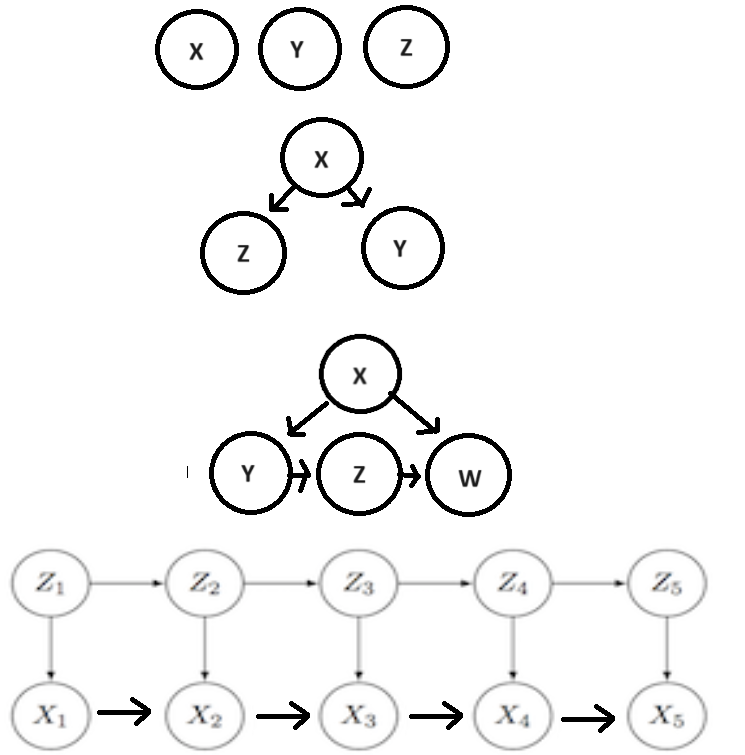



***Exercise 3***: How much time does it take to compute the joint probability $P({\bf X}, {\bf Z} | \Theta)$ in terms of $N$ and $K$, where ${\bf X} = {{\bf x}_1, \ldots, {\bf x}_N }$, ${\bf Z} = {{\bf z}_1, \ldots, {\bf z}_N }$, and $K$ is the number of hidden states in the hidden Markov model $\Theta$, using the formula on slide 10 from the lecture on Nov 13?


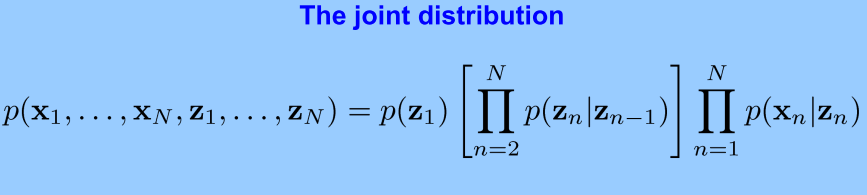

K = alle de hidden states der er (værdien kan findes i konstant tid fordi vi har været matrix)
N = antal punkter i sekvensen

z = sekvensen af hidden states
x = sekvensen af visible states
Theta = alle emissions- og transitions sandsynligheder gemmes som parametre i theta

Han vil altså gerne have at man udregner sandsynligheden for at se en sekvens af x samt en sekvens af z udfra de forskellige parametre i theta.

Vi antager, at vi skal udregne sandsynligheden for at observere en specifik sekvens Z givet en bestemt sekvens X (altså at hvis vi observerer Z, hvad er sandsynligheden så for at vi har den givet Z).

O(N) fordi man skal udregne sandsynligheden for hver punkt i sekvensen x og gange dem sammen.

Hvis man skal udregne alle de mulige sammensætninger af sekvensen x. 
O(N*K^N) fordi der vil være K^N mulige kombinationer af x og hvor tager O(N) af udregne (^^)

# Practical exercises

In the exercise below, you will see an example of how a hidden Markov model (HMM)
can be represented, and you will implement and experiment with the computation of the joint probability as explained in the lecture on Nov 13 (week 11).

# 1 - Representing an HMM

We can represent a HMM as a triple consisting of three matrices: a $K \times 1$ matrix with the initial state probabilities, a $K \times K$ matrix with the transition probabilities and a $K \times |\Sigma|$ matrix with the emission probabilities. In Python we can write the matrices like this:

In [1]:
init_probs_7_state = [0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00]

trans_probs_7_state = [
    [0.00, 0.00, 0.90, 0.10, 0.00, 0.00, 0.00],
    [1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.05, 0.90, 0.05, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00],
    [0.00, 0.00, 0.00, 0.10, 0.90, 0.00, 0.00],
]

emission_probs_7_state = [
    #   A     C     G     T
    [0.30, 0.25, 0.25, 0.20],
    [0.20, 0.35, 0.15, 0.30],
    [0.40, 0.15, 0.20, 0.25],
    [0.25, 0.25, 0.25, 0.25],
    [0.20, 0.40, 0.30, 0.10],
    [0.30, 0.20, 0.30, 0.20],
    [0.15, 0.30, 0.20, 0.35],
]

How do we use these matrices? Remember that we are given some sequence of observations, e.g. like this:

In [2]:
obs_example = 'GTTTCCCAGTGTATATCGAGGGATACTACGTGCATAGTAACATCGGCCAA'

Initial = viser sandsynligheden for at starte i de forskellige states. I dette eksempel kan man altså kun starte i state 4.

Trans = viser sandsynligheden for at gå fra et state til et andet. Viser alle overgange.

Emission = Beskriver sandsynligheden for at en observation ses ved en bestemt hidden state, altså fx sandsynligheden for at man ser solvejr ved H-tryk. Her vil det være sandsynligheden for at se de 4 baser givet de 7 states.

Samlet giver disse 3 matrix theta/parameter space

To make a lookup in our three matrices, it is convenient to translate each symbol in the string to an index.

In [3]:
def translate_observations_to_indices(obs):
    mapping = {'a': 0, 'c': 1, 'g': 2, 't': 3}
    return [mapping[symbol.lower()] for symbol in obs]

Det gør vi fordi det er smart at have tal i en liste istedet for bogstaver i en string, gør det nemmere at finde værdier i vores matrixer

Let's try to translate the example above using this function:

In [4]:
obs_example_trans = translate_observations_to_indices(obs_example)

In [5]:
obs_example_trans

[2,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 2,
 3,
 2,
 3,
 0,
 3,
 0,
 3,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 3,
 0,
 1,
 3,
 0,
 1,
 2,
 3,
 2,
 1,
 0,
 3,
 0,
 2,
 3,
 0,
 0,
 1,
 0,
 3,
 1,
 2,
 2,
 1,
 1,
 0,
 0]

Use the function below to translate the indices back to observations:

In [6]:
def translate_indices_to_observations(indices):
    mapping = ['a', 'c', 'g', 't']
    return ''.join(mapping[idx] for idx in indices)

In [7]:
translate_indices_to_observations(translate_observations_to_indices(obs_example))

'gtttcccagtgtatatcgagggatactacgtgcatagtaacatcggccaa'

Now each symbol has been transformed (predictably) into a number which makes it much easier to make lookups in our matrices. We'll do the same thing for a list of states (a path):

In [8]:
def translate_path_to_indices(path):
    return list(map(lambda x: int(x), path))

def translate_indices_to_path(indices):
    return ''.join([str(i) for i in indices])

Given a path through an HMM, we can now translate it to a list of indices:

In [11]:
path_example = '33333333333321021021021021021021021021021021021021'

translate_path_to_indices(path_example)

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1]

Finally, we can collect the three matrices in a class to make it easier to work with our HMM.

In [9]:
class hmm:
    def __init__(self, init_probs, trans_probs, emission_probs):
        self.init_probs = init_probs
        self.trans_probs = trans_probs
        self.emission_probs = emission_probs

# Collect the matrices in a class.
hmm_7_state = hmm(init_probs_7_state, trans_probs_7_state, emission_probs_7_state)

# We can now reach the different matrices by their names. E.g.:
hmm_7_state.trans_probs

[[0.0, 0.0, 0.9, 0.1, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.05, 0.9, 0.05, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.1, 0.9, 0.0, 0.0]]

For testing, here's another model (which we will refer to as the 3-state model).

In [10]:
init_probs_3_state = [0.10, 0.80, 0.10]

trans_probs_3_state = [
    [0.90, 0.10, 0.00],
    [0.05, 0.90, 0.05],
    [0.00, 0.10, 0.90],
]

emission_probs_3_state = [
    #   A     C     G     T
    [0.40, 0.15, 0.20, 0.25],
    [0.25, 0.25, 0.25, 0.25],
    [0.20, 0.40, 0.30, 0.10],
]

hmm_3_state = hmm(init_probs_3_state, trans_probs_3_state, emission_probs_3_state)

# 2 - Validating an HMM (and handling floats)

Before using the model we'll write a function to validate that the model is valid. That is, the matrices should have the right dimensions and the following things should be true:

1. The initial probabilities must sum to 1.
2. Each row in the matrix of transition probabilities must sum to 1.
3. Each row in the matrix of emission probabilities must sum to 1.
4. All numbers should be between 0 and 1, inclusive.

Write a function `validate_hmm` that given a model returns True if the model is valid, and False otherwise:

In [30]:
def validate_hmm(model):
    #print(sum(model.init_probs))
    #print(abs(sum(model.init_probs)-1))
    if abs(sum(model.init_probs)-1) > 0.0001:
        return False

    for row in model.trans_probs:
        #print(abs(sum(row)-1))
        if abs(sum(row)-1) > 0.0001:
            return False
    
    for row in model.emission_probs:
        if abs(sum(row)-1) > 0.0001:
            return False
    
    return True

We can now use this function to check whether the example model is a valid model.

In [31]:
print(validate_hmm(hmm_7_state))

True


You might run into problems related to summing floating point numbers because summing floating point numbers does not (always) give the expected result as illustrated by the following examples. How do you suggest to deal with this?

In [2]:
0.15 + 0.30 + 0.20 + 0.35

0.9999999999999999

The order of the terms matter.

In [3]:
0.20 + 0.35 + 0.15 + 0.30

1.0

Because it changes the prefix sums

In [4]:
0.15 + 0.30

0.44999999999999996

In [5]:
0.20 + 0.35 + 0.15

0.7000000000000001

In [6]:
0.15 + 0.30

0.44999999999999996

On should never compare floating point numbers. They represent only an 'approximation'. Read more about the 'problems' in 'What Every Computer Scientist Should Know About Floating-Point Arithmetic' at:

http://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

# 3 - Computing the Joint Probability

Recall that the joint probability $p({\bf X}, {\bf Z}) = p({\bf x}_1, \ldots, {\bf x}_N, {\bf z}_1, \ldots, {\bf z}_N)$ of a hidden Markov model (HMM) can be compute as

$$
p({\bf x}_1, \ldots, {\bf x}_N, {\bf z}_1, \ldots, {\bf z}_N) = p({\bf z}_1) 
\left[ \prod_{n=2}^N p({\bf z}_n \mid {\bf z}_{n-1}) \right]
\prod_{n=1}^N p({\bf x}_n \mid {\bf z}_n)
$$

## Implementing without log-transformation

Write a function `joint_prob` given a model (e.g. in the representation above) and sequence of observables, ${\bf X}$, and a sequence of hidden states, ${\bf Z}$, computes the joint probability cf. the above formula.

In [69]:
def joint_prob(model, x, z):
    #p(z1)*p(x1|z1)
    if len(x)==0:
        return False
    
    prob = model.init_probs[z[0]] * model.emission_probs[z[0]][x[0]]
   
   #resten
    for i in range(1, len(z)):
        prob = prob * model.trans_probs[z[i-1]][z[i]] * model.emission_probs[z[i]][x[i]]
    
    return prob

Now compute the joint probability of the ${\bf X}$ (`x_short`) and ${\bf Z}$ (`z_short`) below using the 7-state (`hmm_7_state`) model introduced above. (*Remember to translate them first using the appropriate functions introduces above!*)

In [60]:
x_short = translate_observations_to_indices('GTTTCCCAGTGTATATCGAGGGATACTACGTGCATAGTAACATCGGCCAA')
z_short = translate_path_to_indices('33333333333321021021021021021021021021021021021021')



print(joint_prob(hmm_7_state, x_short, z_short))

# Your code here ...

1.9114255184318858e-31


## Implementing with log-transformation (i.e. in "log-space")

Now implement the joint probability function using log-transformation as explained in the lecture. We've given you a log-function that handles $\log(0)$.

In [62]:
def log(x):
    if x == 0:
        return float('-inf')
    return math.log(x)

def joint_prob_log(model, x, z):
    prob = log(model.init_probs[z[0]]) + log(model.emission_probs[z[0]][x[0]])
   
   #resten
    for i in range(1, len(z)):
        prob = prob + log(model.trans_probs[z[i-1]][z[i]]) + log(model.emission_probs[z[i]][x[i]])
    
    return prob

Confirm that the log-transformed function is correct by comparing the output of `joint_prob_log` to the output of `joint_prob`.

In [67]:
# Your code here ...
x_short = translate_observations_to_indices('GTTTCCCAGTGTATATCGAGGGATACTACGTGCATAGTAACATCGGCCAA')
z_short = translate_path_to_indices('33333333333321021021021021021021021021021021021021')


print(joint_prob_log(hmm_7_state, x_short, z_short))

print(log(joint_prob(hmm_7_state, x_short, z_short)))

-70.73228857440488
-70.73228857440486


## Comparison of Implementations

Now that you have two ways to compute the joint probability given a model, a sequence of observations, and a sequence of hidden states, try to make an experiment to figure out how long a sequence can be before it becomes essential to use the log-transformed version. For this experiment we'll use two longer sequences.

Her menes: før at resulatet bliver 0 selvom det ikke burde det

In [68]:
x_long = 'TGAGTATCACTTAGGTCTATGTCTAGTCGTCTTTCGTAATGTTTGGTCTTGTCACCAGTTATCCTATGGCGCTCCGAGTCTGGTTCTCGAAATAAGCATCCCCGCCCAAGTCATGCACCCGTTTGTGTTCTTCGCCGACTTGAGCGACTTAATGAGGATGCCACTCGTCACCATCTTGAACATGCCACCAACGAGGTTGCCGCCGTCCATTATAACTACAACCTAGACAATTTTCGCTTTAGGTCCATTCACTAGGCCGAAATCCGCTGGAGTAAGCACAAAGCTCGTATAGGCAAAACCGACTCCATGAGTCTGCCTCCCGACCATTCCCATCAAAATACGCTATCAATACTAAAAAAATGACGGTTCAGCCTCACCCGGATGCTCGAGACAGCACACGGACATGATAGCGAACGTGACCAGTGTAGTGGCCCAGGGGAACCGCCGCGCCATTTTGTTCATGGCCCCGCTGCCGAATATTTCGATCCCAGCTAGAGTAATGACCTGTAGCTTAAACCCACTTTTGGCCCAAACTAGAGCAACAATCGGAATGGCTGAAGTGAATGCCGGCATGCCCTCAGCTCTAAGCGCCTCGATCGCAGTAATGACCGTCTTAACATTAGCTCTCAACGCTATGCAGTGGCTTTGGTGTCGCTTACTACCAGTTCCGAACGTCTCGGGGGTCTTGATGCAGCGCACCACGATGCCAAGCCACGCTGAATCGGGCAGCCAGCAGGATCGTTACAGTCGAGCCCACGGCAATGCGAGCCGTCACGTTGCCGAATATGCACTGCGGGACTACGGACGCAGGGCCGCCAACCATCTGGTTGACGATAGCCAAACACGGTCCAGAGGTGCCCCATCTCGGTTATTTGGATCGTAATTTTTGTGAAGAACACTGCAAACGCAAGTGGCTTTCCAGACTTTACGACTATGTGCCATCATTTAAGGCTACGACCCGGCTTTTAAGACCCCCACCACTAAATAGAGGTACATCTGA'
z_long = '3333321021021021021021021021021021021021021021021021021021021021021021033333333334564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564563210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210210321021021021021021021021033334564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564564563333333456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456456332102102102102102102102102102102102102102102102102102102102102102102102102102102102102102102102103210210210210210210210210210210210210210210210210210210210210210'

Now compute the joint probability with `joint_prob` the 7-state (hmm_7_state) model introduced above, and see when it breaks (i.e. when it wrongfully becomes 0). Does this make sense? Here's some code to get you started.

In [80]:
for i in range(1, len(x_long), 1):
    x = x_long[:i]
    z = z_long[:i]
    
    x_trans = translate_observations_to_indices(x)
    z_trans = translate_path_to_indices(z)

    prob = joint_prob(hmm_7_state, x_trans, z_trans)
    #print(prob)
    if prob == 0:
        print(i)
        break
    
    
    

    # Make your experiment here...

530


In the cell below you should state for which $i$ computing the joint probability (of the first $i$ symbols of `x_long` and `z_long`) using `joint_prob` wrongfully becomes 0.

**Your answer here:**

For the 7-state model, `joint_prob` (of the first $i$ symbols of `x_long` and `z_long`) becomes 0 for **i = 600**.